In [213]:
!pip install tensorflow keras opencv-python scikit-learn matplotlib

import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base directory
base_dir = "data"

# Define subfolders (train, test, validation)
data_dirs = {
    "train": os.path.join(base_dir, "train"),
    "test": os.path.join(base_dir, "test"),
    "validation": os.path.join(base_dir, "validation")
}

# Define categories
categories = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

# Set image size to 64x64 (smaller for faster processing)
IMG_SIZE = 64  

# Function to load images and labels efficiently
def load_data(data_path, img_size=IMG_SIZE, color_mode=cv2.IMREAD_COLOR):
    images, labels = [], []
    
    for category in categories:
        path = os.path.join(data_path, category)
        if not os.path.exists(path):
            print(f"Path does not exist: {path}")
            continue
        
        label = categories.index(category)
        
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, color_mode)
            
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(label)
    
    images = np.array(images, dtype=np.float32) / 255.0  # Normalize images
    labels = to_categorical(np.array(labels), num_classes=len(categories))  # One-hot encoding
    
    return images, labels

# Load datasets
X_train, y_train = load_data(data_dirs['train'])
X_test, y_test = load_data(data_dirs['test'])
X_val, y_val = load_data(data_dirs['validation'])

print(f"Train: {X_train.shape}, Test: {X_test.shape}, Val: {X_val.shape}")


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train: (3229, 64, 64, 3), Test: (361, 64, 64, 3), Val: (3229, 64, 64, 3)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_cnn_model1(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model Summary
input_shape = (IMG_SIZE, IMG_SIZE, 3)
num_classes = len(categories)
model1 = build_cnn_model1(input_shape, num_classes)
model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,797 (6.20 MB)

 Trainable params: 1,625,797 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train all models
epochs = 20
batch_size = 32

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.5372 - loss: 1.1594 - val_accuracy: 0.6980 - val_loss: 0.8556
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.7009 - loss: 0.8133 - val_accuracy: 0.7203 - val_loss: 0.7535
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - accuracy: 0.7143 - loss: 0.7779 - val_accuracy: 0.7324 - val_loss: 0.7277
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.7179 - loss: 0.7567 - val_accuracy: 0.7355 - val_loss: 0.7196
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.7274 - loss: 0.7618 - val_accuracy: 0.7330 - val_loss: 0.6930
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.7358 - loss: 0.7042 - val_accuracy: 0.7560 - val_loss: 0.6705
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.7554 - loss: 0.6690 - val_accuracy: 0.7634 - val_loss: 0.6721
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.7574 - loss: 0

In [38]:
from tensorflow.keras.layers import BatchNormalization, Dropout

def build_cnn_model2(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model2 = build_cnn_model2(input_shape, num_classes)
model2.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,275,333 (4.87 MB)

 Trainable params: 1,274,885 (4.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [41]:
# Train all models
epochs = 20
batch_size = 32


history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)
#history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.6052 - loss: 2.0357 - val_accuracy: 0.0777 - val_loss: 3.6853
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - accuracy: 0.7022 - loss: 0.8436 - val_accuracy: 0.1428 - val_loss: 2.4435
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 35s 316ms/step - accuracy: 0.7196 - loss: 0.7791 - val_accuracy: 0.2567 - val_loss: 1.6822
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 41s 318ms/step - accuracy: 0.7439 - loss: 0.7231 - val_accuracy: 0.3527 - val_loss: 2.0704
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - accuracy: 0.7401 - loss: 0.7129 - val_accuracy: 0.4655 - val_loss: 1.4400
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 377ms/step - accuracy: 0.7613 - loss: 0.6669 - val_accuracy: 0.2874 - val_loss: 2.9909
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.7770 - loss: 0.5883 - val_accuracy: 0.4199 - val_loss: 10.7776
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.7753 - loss: 

In [42]:
def build_cnn_model3(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model3 = build_cnn_model3(input_shape, num_classes)
model3.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,797 (6.20 MB)

 Trainable params: 1,625,797 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Train all models
epochs = 20
batch_size = 32

#history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)
#history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.5479 - loss: 1.2372 - val_accuracy: 0.7083 - val_loss: 0.8320
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.6989 - loss: 0.8453 - val_accuracy: 0.7126 - val_loss: 0.7937
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.7141 - loss: 0.7978 - val_accuracy: 0.7296 - val_loss: 0.7451
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.7152 - loss: 0.7773 - val_accuracy: 0.7163 - val_loss: 0.7520
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.7127 - loss: 0.7755 - val_accuracy: 0.7250 - val_loss: 0.7259
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.7211 - loss: 0.7737 - val_accuracy: 0.7479 - val_loss: 0.6941
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.7450 - loss: 0.7293 - val_accuracy: 0.7334 - val_loss: 0.7178
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.7302 - loss: 0

In [46]:
def build_custom_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(128, (3,3), activation='relu'),
        Dropout(0.3),  # Used from Model 3
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),  # Stronger dropout
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

custom_model = build_custom_model(input_shape, num_classes)
custom_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,821 (4.86 MB)

 Trainable params: 1,274,629 (4.86 MB)

 Non-trainable params: 192 (768.00 B)

In [49]:
history_custom = custom_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)


Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 375ms/step - accuracy: 0.5999 - loss: 1.8515 - val_accuracy: 0.2738 - val_loss: 1.6095
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 32s 311ms/step - accuracy: 0.7232 - loss: 0.7991 - val_accuracy: 0.2741 - val_loss: 1.5973
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - accuracy: 0.7423 - loss: 0.7324 - val_accuracy: 0.2741 - val_loss: 1.7454
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 32s 315ms/step - accuracy: 0.7464 - loss: 0.7032 - val_accuracy: 0.2896 - val_loss: 2.5146
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 32s 313ms/step - accuracy: 0.7409 - loss: 0.6850 - val_accuracy: 0.3800 - val_loss: 1.7839
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 32s 318ms/step - accuracy: 0.7753 - loss: 0.6245 - val_accuracy: 0.6079 - val_loss: 1.3665
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 32s 317ms/step - accuracy: 0.7688 - loss: 0.6168 - val_accuracy: 0.3753 - val_loss: 1.6522
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 34s 336ms/step - accuracy: 0.7932 - loss: 0

In [51]:
# Evaluate each model
test_loss1, test_acc1 = model1.evaluate(X_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=0)
test_loss3, test_acc3 = model3.evaluate(X_test, y_test, verbose=0)
test_loss_custom, test_acc_custom = custom_model.evaluate(X_test, y_test, verbose=0)

# Print comparison
print(f"Model 1 - Basic CNN: Accuracy = {test_acc1:.4f}, Loss = {test_loss1:.4f}")
print(f"Model 2 - Deep CNN with BatchNorm: Accuracy = {test_acc2:.4f}, Loss = {test_loss2:.4f}")
print(f"Model 3 - CNN with Dropout: Accuracy = {test_acc3:.4f}, Loss = {test_loss3:.4f}")
print(f"Custom CNN Model: Accuracy = {test_acc_custom:.4f}, Loss = {test_loss_custom:.4f}")


Model 1 - Basic CNN: Accuracy = 0.7396, Loss = 0.8244
Model 2 - Deep CNN with BatchNorm: Accuracy = 0.2382, Loss = 27.4122
Model 3 - CNN with Dropout: Accuracy = 0.7479, Loss = 0.6971
Custom CNN Model: Accuracy = 0.3850, Loss = 33.4128


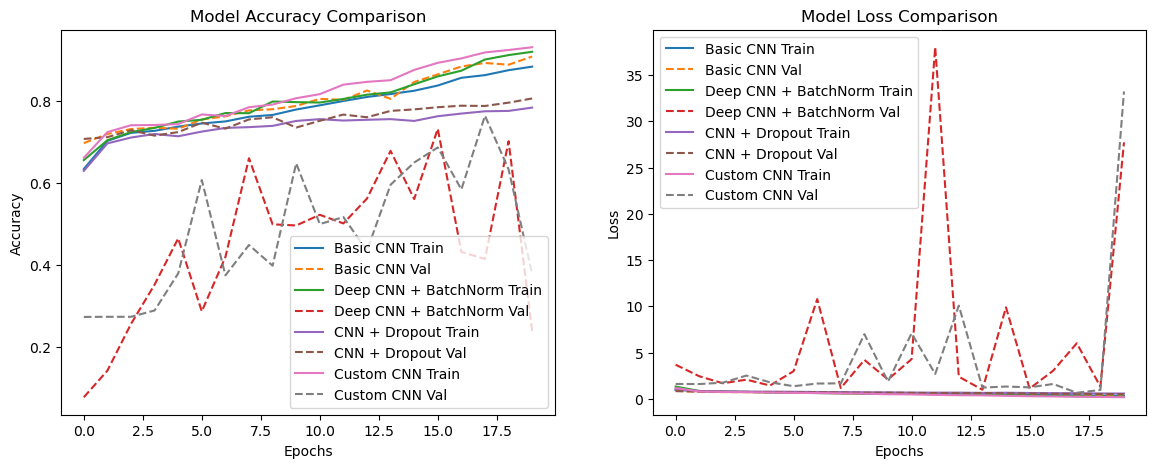

In [53]:
import matplotlib.pyplot as plt

def plot_training_history(histories, labels):
    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} Train')
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{label} Val')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], linestyle='dashed', label=f'{label} Val')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss Comparison')
    plt.legend()

    plt.show()

# List of all models' history
histories = [history1, history2, history3, history_custom]
labels = ["Basic CNN", "Deep CNN + BatchNorm", "CNN + Dropout", "Custom CNN"]

# Plot the training history
plot_training_history(histories, labels)


In [55]:
import matplotlib.pyplot as plt

def plot_model_performance(history, model_name):
    """Function to plot accuracy and loss graphs for a given model."""
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()

    plt.show()


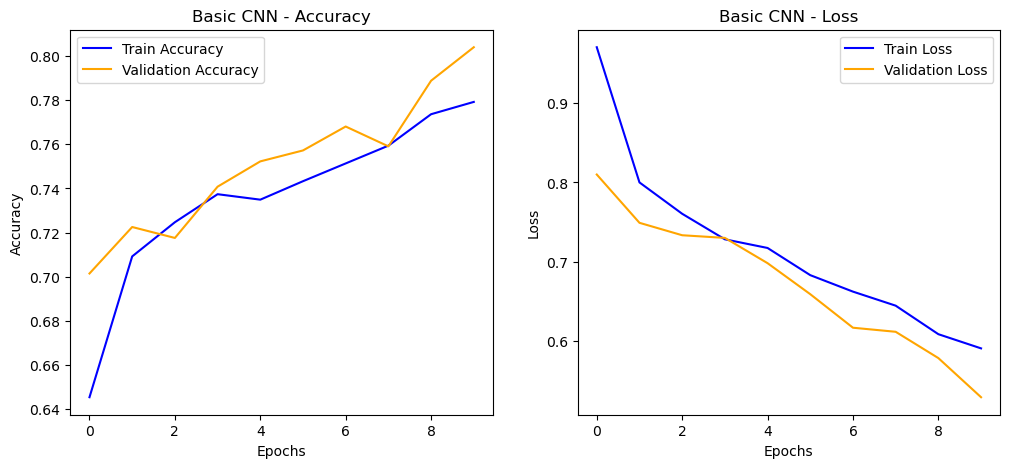

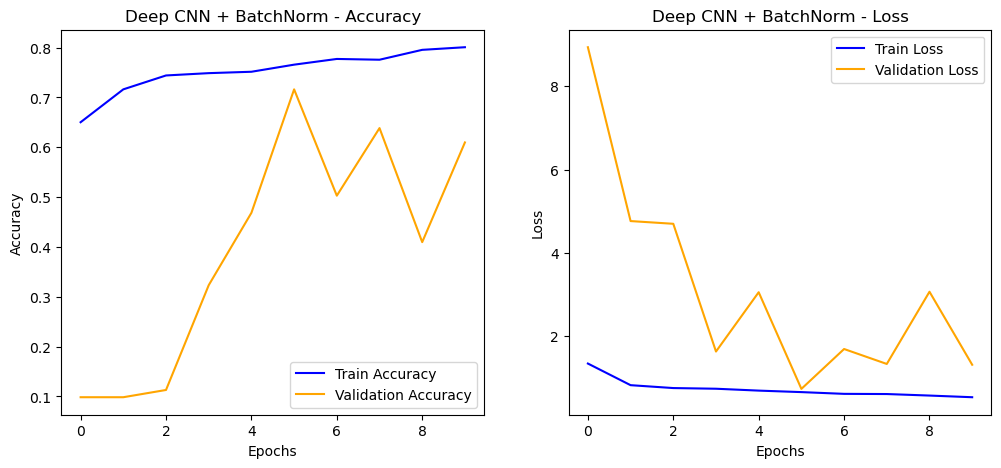

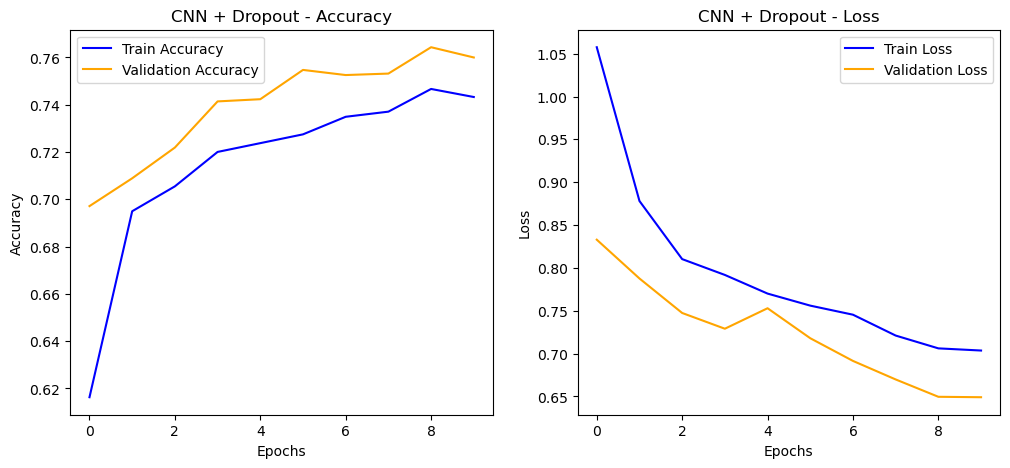

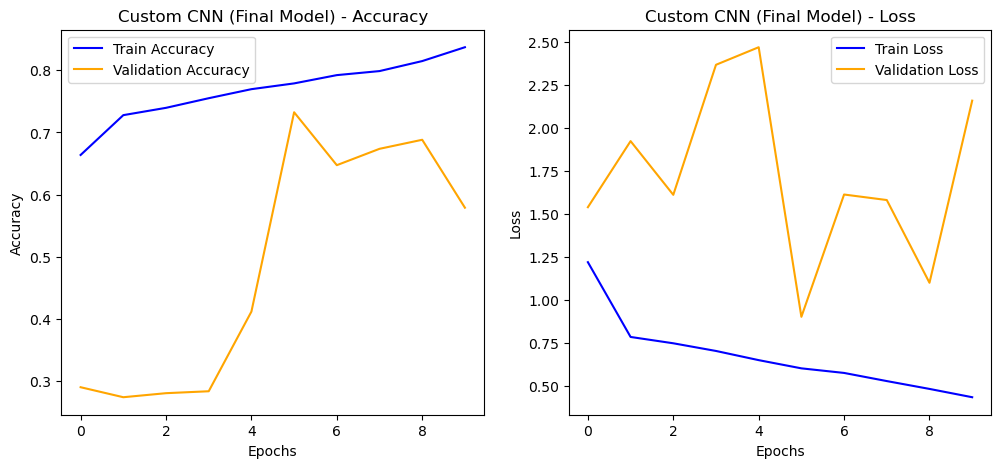

In [37]:
# Plot performance for Basic CNN
plot_model_performance(history1, "Basic CNN")

# Plot performance for Deep CNN + BatchNorm
plot_model_performance(history2, "Deep CNN + BatchNorm")

# Plot performance for CNN + Dropout
plot_model_performance(history3, "CNN + Dropout")

# Plot performance for Custom CNN (Final Model)
plot_model_performance(history_custom, "Custom CNN (Final Model)")


In [105]:
# Save the trained model
custom_model.save("custom_model_hi.h5")


In [107]:
from tensorflow.keras.models import load_model

# Load the saved custom model
custom_cnn_model = load_model("custom_model_hi.h5")  # Update with your actual model filename
print("\n✅ Custom CNN Model Loaded Successfully!")



✅ Custom CNN Model Loaded Successfully!


In [129]:
import cv2
import numpy as np

IMG_SIZE = 64  # Image size used during training
categories = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

def preprocess_image(image_path):
    """
    Load and preprocess the image correctly.
    """
    try:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read image
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
        img = img.astype(np.float32) / 255.0  # Normalize
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        return img
    except Exception as e:
        print(f"⚠️ Error loading image: {e}")
        return None


In [131]:
def predict_category(model, image_path):
    """
    Predict the category of an image and display the confidence.
    """
    img = preprocess_image(image_path)
    if img is None:
        print("⚠️ Error processing image.")
        return

    prediction = model.predict(img)  # Get predictions
    predicted_class = np.argmax(prediction)  # Class with highest probability
    confidence = np.max(prediction)  # Confidence score

    print(f"🖼️ Image: {image_path}")
    print(f"🎯 Predicted Class: {categories[predicted_class]} (Confidence: {confidence*100:.2f}%)")

    return categories[predicted_class], confidence


In [137]:
import streamlit as st
import numpy as np
import cv2
from PIL import Image

# Title
st.title("👁️ Diabetic Retinopathy Classification")
st.write("Upload an image to classify.")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

def preprocess_uploaded_image(image):
    """
    Preprocess the uploaded image for prediction.
    """
    img = np.array(image)  # Convert to NumPy array
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
    img = img.astype(np.float32) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Expand dimensions
    return img

def predict_uploaded_image(model, image):
    """
    Predict category for an uploaded image.
    """
    img = preprocess_uploaded_image(image)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    return categories[predicted_class], confidence

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    if st.button("🔍 Predict"):
        prediction, confidence = predict_uploaded_image(custom_model, image)
        st.write(f"### 🎯 Prediction: {prediction} (Confidence: {confidence*100:.2f}%)")


2025-02-15 14:15:46.941 
  command:

    streamlit run C:\Users\Shu\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [75]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=categories))


Classification Report:
                 precision    recall  f1-score   support

         No_DR       1.00      0.22      0.37       179
          Mild       0.00      0.00      0.00        36
      Moderate       0.31      1.00      0.47        99
        Severe       0.00      0.00      0.00        19
Proliferate_DR       0.00      0.00      0.00        28

      accuracy                           0.39       361
     macro avg       0.26      0.24      0.17       361
  weighted avg       0.58      0.39      0.31       361



In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoding for multi-class AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # 5 classes

# Compute AUC score
auc_score = roc_auc_score(y_test_bin, y_pred_probs, multi_class="ovr")
print(f"ROC AUC Score: {auc_score:.4f}")


ROC AUC Score: 0.6119


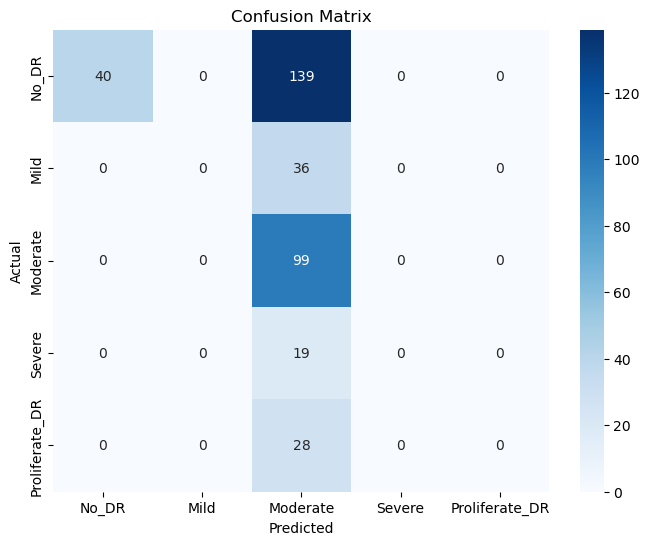

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [238]:
import cv2
import numpy as np

def preprocess_image(image_path, img_size=64):
    """
    Load and preprocess a single image for prediction.
    """
    try:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read the image
        img = cv2.resize(img, (img_size, img_size))     # Resize to match model input
        img = img / 255.0                               # Normalize pixel values
        img = np.expand_dims(img, axis=0)              # Expand dimensions (batch size = 1)
        return img
    except Exception as e:
        print(f"Error loading image: {e}")
        return None


In [223]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

# Normalize image (scale pixels to range 0-1)
def normalize_image(img):
    return img / 255.0

# Enhance contrast using histogram equalization
def enhance_contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)  # Apply histogram equalization
    return cv2.merge((l, a, b))

# Remove noise using Gaussian blur
def remove_noise(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# Apply thresholding
def apply_threshold(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return binary

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
def apply_clahe(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(gray)

# Detect edges using Canny
def detect_edges(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray, 100, 200)


In [225]:
def select_random_images(base_path, categories):
    """Select one random image per category from the test set."""
    example_images = {}

    for category in categories:
        category_path = os.path.join(base_path, category)
        if not os.path.exists(category_path):
            print(f"Path does not exist: {category_path}")
            continue

        img_list = os.listdir(category_path)
        if len(img_list) == 0:
            print(f"No images found in {category_path}")
            continue

        random_img = random.choice(img_list)  # Select one random image
        img_path = os.path.join(category_path, random_img)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if img is not None:
            example_images[category] = cv2.resize(img, (64, 64))  # Resize for consistency

    return example_images


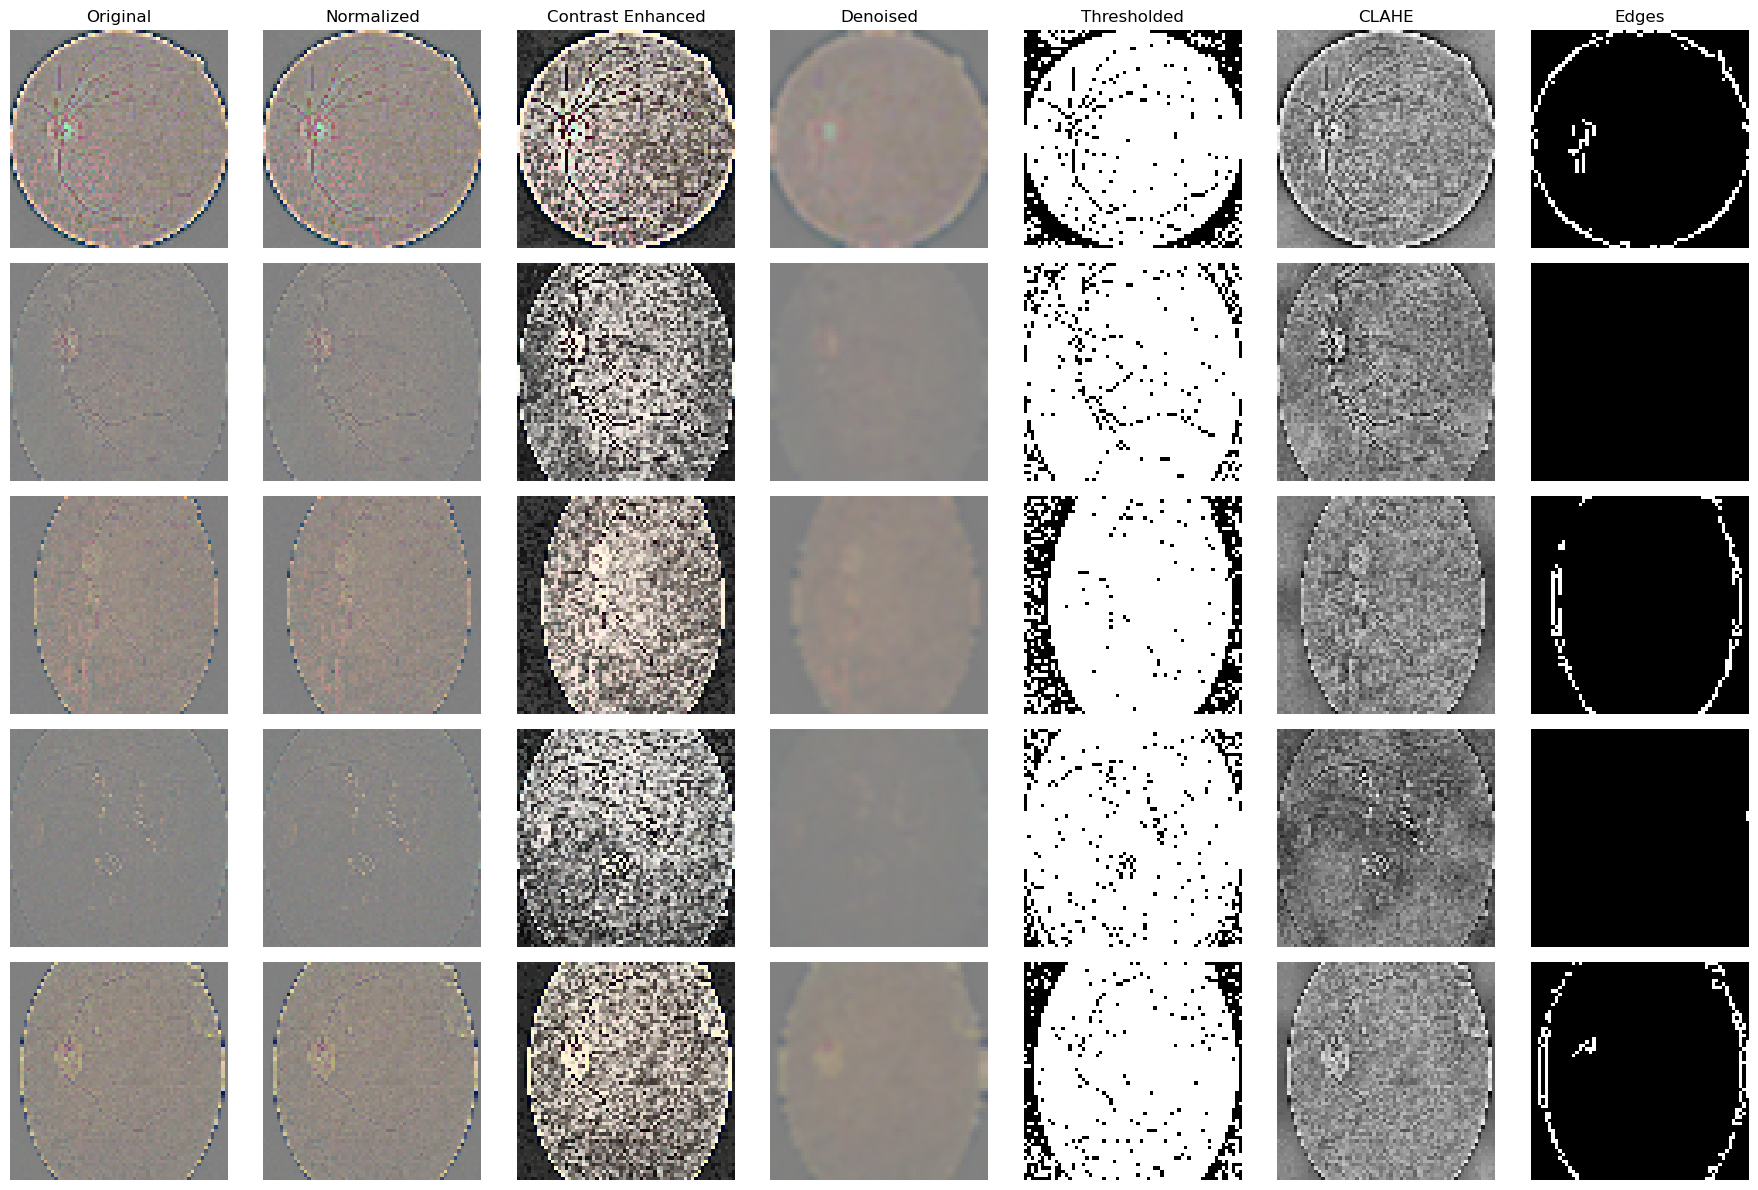

In [227]:
# Select test images
example_images = select_random_images(data_dirs["test"], categories)

# Create subplots
fig, axes = plt.subplots(len(categories), 7, figsize=(18, 12))

# Titles for columns
titles = ["Original", "Normalized", "Contrast Enhanced", "Denoised",
          "Thresholded", "CLAHE", "Edges"]

for i, category in enumerate(categories):
    if category not in example_images:
        continue  # Skip if no image was found

    img = example_images[category]  # Get original image

    # Apply all preprocessing steps
    norm_img = normalize_image(img)
    contrast_img = enhance_contrast(img)
    denoised_img = remove_noise(img)
    threshold_img = apply_threshold(img)
    clahe_img = apply_clahe(img)
    edge_img = detect_edges(img)

    # Convert images to correct format for display
    processed_images = [
        img,  # Original
        (norm_img * 255).astype(np.uint8),  # Normalized
        cv2.cvtColor(contrast_img, cv2.COLOR_LAB2BGR),  # Convert back from LAB
        denoised_img,  # Denoised
        threshold_img,  # Thresholded (Grayscale)
        clahe_img,  # CLAHE (Grayscale)
        edge_img  # Edge Detection (Grayscale)
    ]

    # Plot each transformation
    for j, proc_img in enumerate(processed_images):
        if len(proc_img.shape) == 2:  # Grayscale images
            axes[i, j].imshow(proc_img, cmap="gray")
        else:
            axes[i, j].imshow(cv2.cvtColor(proc_img, cv2.COLOR_BGR2RGB))
        
        axes[i, j].axis("off")
        if i == 0:  # Add titles only to the first row
            axes[i, j].set_title(titles[j], fontsize=12)

# Show the final plot
plt.tight_layout()
plt.show()


In [230]:
import cv2
import numpy as np

# 1️⃣ Otsu's Thresholding (Automatic thresholding)
def otsu_threshold(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded

# 2️⃣ K-means Clustering Segmentation
def kmeans_segmentation(img, k=3):
    img_reshape = img.reshape((-1, 3))  # Reshape to 2D array
    img_reshape = np.float32(img_reshape)

    # Define criteria and apply k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(img_reshape, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    segmented = centers[labels.flatten()]
    return segmented.reshape(img.shape)

# 3️⃣ Morphological Segmentation (for noise removal)
def morphological_segmentation(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    return morph

# 4️⃣ Edge Detection + Watershed Segmentation
def watershed_segmentation(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Noise removal
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply watershed
    img_copy = img.copy()
    cv2.watershed(img_copy, markers)
    img_copy[markers == -1] = [0, 0, 255]  # Mark boundaries in red

    return img_copy


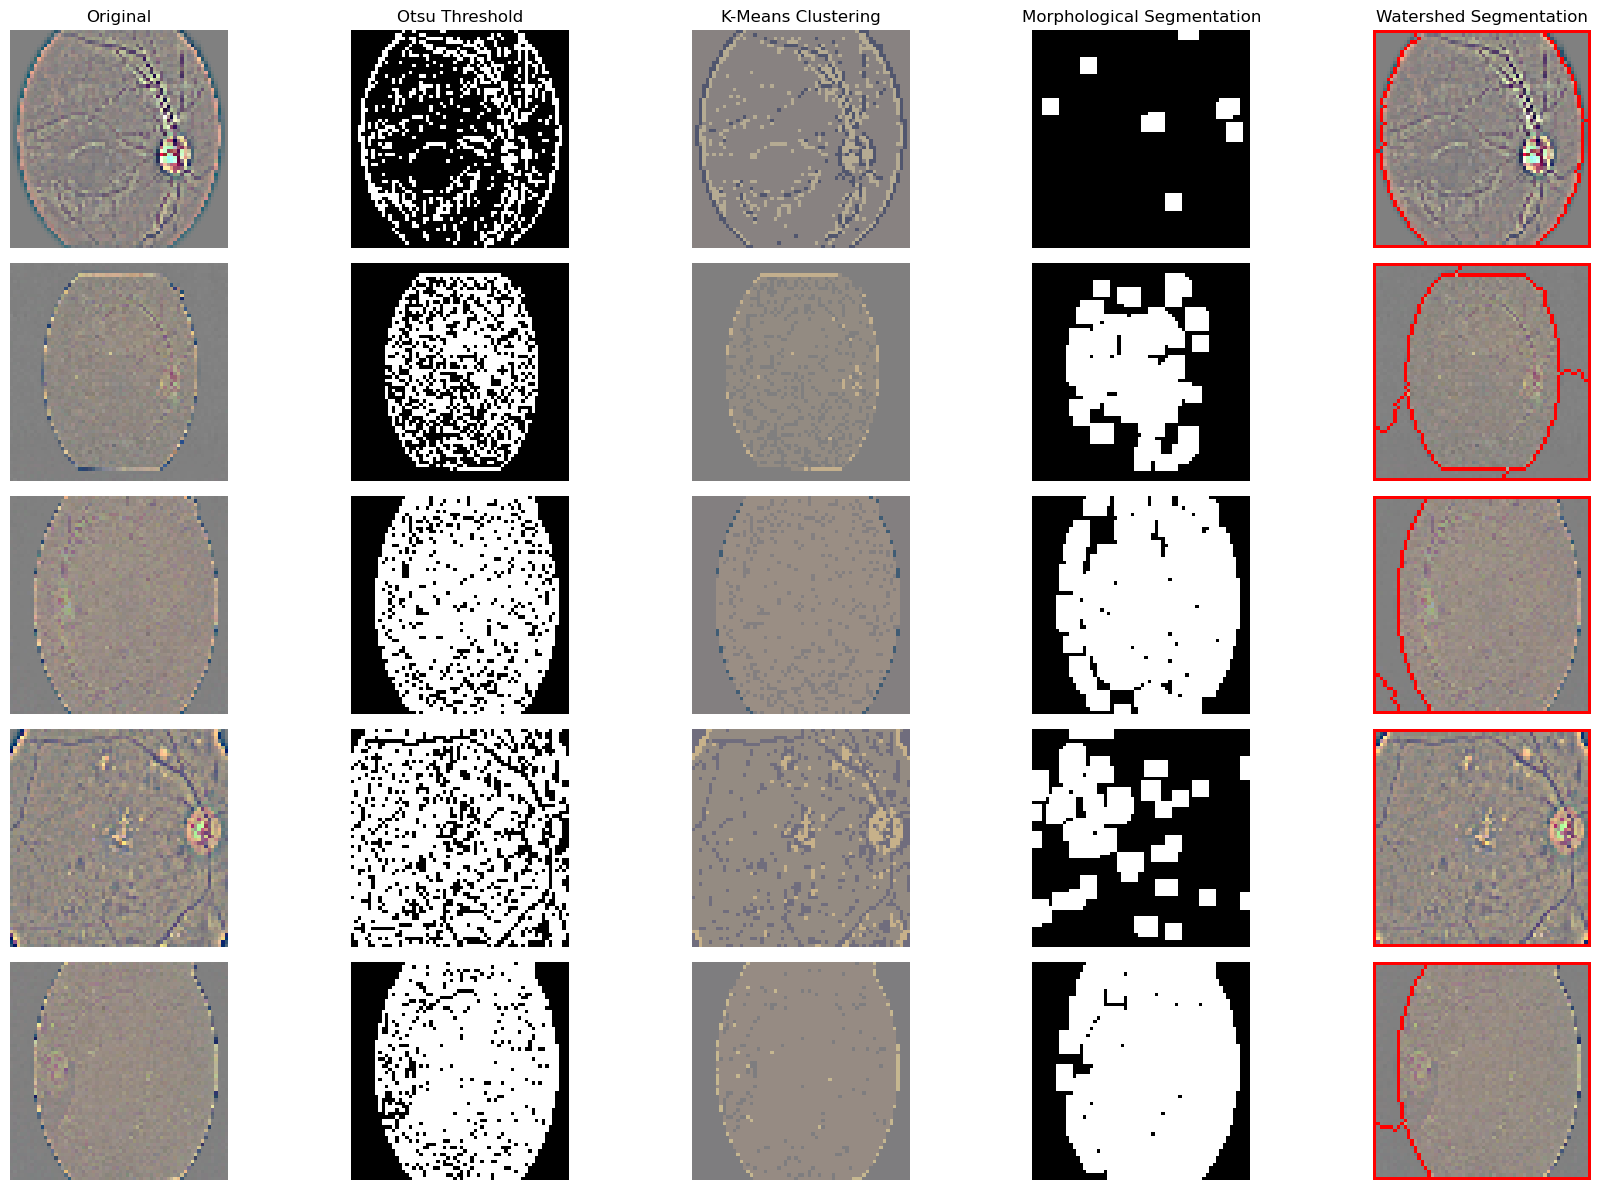

In [232]:
# Select test images
example_images = select_random_images(data_dirs["test"], categories)

# Create subplots
fig, axes = plt.subplots(len(categories), 5, figsize=(18, 12))

# Titles for columns
titles = ["Original", "Otsu Threshold", "K-Means Clustering", "Morphological Segmentation", "Watershed Segmentation"]

for i, category in enumerate(categories):
    if category not in example_images:
        continue  # Skip if no image was found

    img = example_images[category]  # Get original image

    # Apply segmentation techniques
    otsu_img = otsu_threshold(img)
    kmeans_img = kmeans_segmentation(img, k=3)
    morph_img = morphological_segmentation(img)
    watershed_img = watershed_segmentation(img)

    # Convert images for visualization
    processed_images = [
        img,  # Original
        otsu_img,  # Otsu Thresholding (Grayscale)
        kmeans_img,  # K-means Segmentation
        morph_img,  # Morphological Segmentation (Grayscale)
        watershed_img  # Watershed Segmentation
    ]

    # Plot each transformation
    for j, proc_img in enumerate(processed_images):
        if len(proc_img.shape) == 2:  # Grayscale images
            axes[i, j].imshow(proc_img, cmap="gray")
        else:
            axes[i, j].imshow(cv2.cvtColor(proc_img, cv2.COLOR_BGR2RGB))
        
        axes[i, j].axis("off")
        if i == 0:  # Add titles only to the first row
            axes[i, j].set_title(titles[j], fontsize=12)

# Show the final plot
plt.tight_layout()
plt.show()
